Import the neccesaary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings

Data Loading

In [2]:
try:
    # Load the dataset from a CSV file
    df = pd.read_csv("coin_Cardano.csv")
    print("Data loaded successfully")
except FileNotFoundError:
    print("Error: 'coin_Cardano.csv' not found. Please make sure the file is in the same directory")
    exit()
df

Data loaded successfully


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Cardano,ADA,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,5.764130e+07,6.288991e+08
1,2,Cardano,ADA,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,1.699780e+07,5.396927e+08
2,3,Cardano,ADA,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9.000050e+06,5.686195e+08
3,4,Cardano,ADA,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5.562510e+06,5.571390e+08
4,5,Cardano,ADA,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7.780710e+06,4.806646e+08
...,...,...,...,...,...,...,...,...,...,...
1369,1370,Cardano,ADA,2021-07-02 23:59:59,1.394397,1.286607,1.332942,1.394397,2.159410e+09,4.454587e+10
1370,1371,Cardano,ADA,2021-07-03 23:59:59,1.441714,1.359664,1.394152,1.406836,2.028094e+09,4.494324e+10
1371,1372,Cardano,ADA,2021-07-04 23:59:59,1.493717,1.382153,1.404008,1.458184,1.806362e+09,4.658364e+10
1372,1373,Cardano,ADA,2021-07-05 23:59:59,1.461221,1.379284,1.461221,1.404898,1.759461e+09,4.488134e+10


Data Preprocessing

In [3]:
# Rename the columns for clarity and consistency
df.rename(columns={
    "SNo":"serial_number",
    "Name":"name",
    "Symbol":"symbol",
    "Date":"date",
    "High":"high",
    "Low":"low",
    "Open":"open",
    "Close":"close",
    "Volume":"volume",
    "Marketcap":"marketcap"
},inplace=True)

# Convert the "date" column to a datetime object for time series plotting
df["date"] = pd.to_datetime(df["date"])
print(df.info())

# Check for missing values
df_missing = df.isnull().sum()
print("Missing Values")
print(df_missing)

# Check for duplicated rows
df_duplicated = df.duplicated().sum()
print("Duplicated Rows")
print(df_duplicated)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374 entries, 0 to 1373
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   serial_number  1374 non-null   int64         
 1   name           1374 non-null   object        
 2   symbol         1374 non-null   object        
 3   date           1374 non-null   datetime64[ns]
 4   high           1374 non-null   float64       
 5   low            1374 non-null   float64       
 6   open           1374 non-null   float64       
 7   close          1374 non-null   float64       
 8   volume         1374 non-null   float64       
 9   marketcap      1374 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 107.5+ KB
None
Missing Values
serial_number    0
name             0
symbol           0
date             0
high             0
low              0
open             0
close            0
volume           0
marketc

Features Engineering

In [4]:
# Define the features (X) and the target (y)

features = ["high","low","open","volume"]
target = "close"

X = df[features]
y = df[target]

Data Splitting

In [5]:
# Split the data into training and testing sets. We use 80% of the data
# for training and 20% for testing.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f"Training set size: {len(X_train)} samples")
print(f"Testing set size: {len(X_test)} samples")

Training set size: 1099 samples
Testing set size: 275 samples


Visualization before training

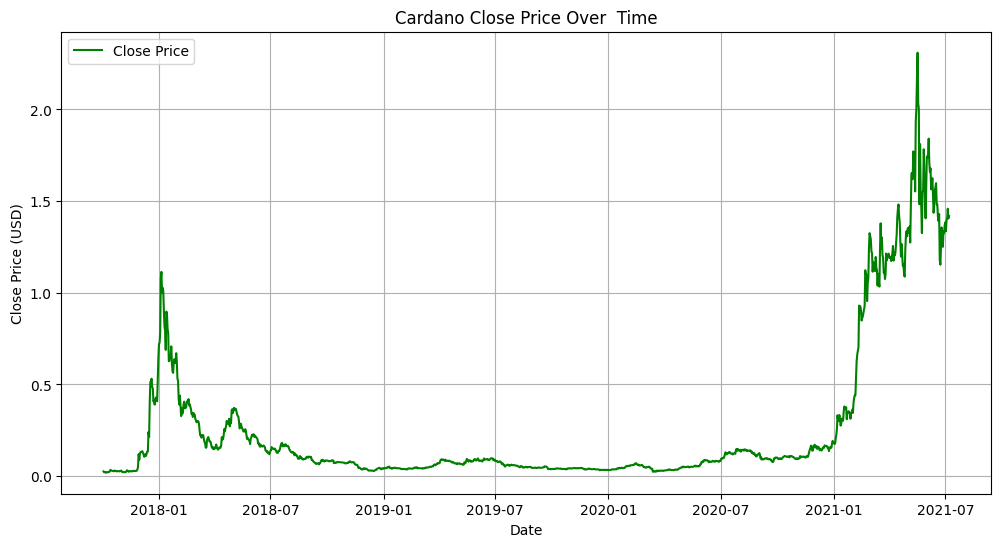

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df["date"],df["close"],label="Close Price",color="green")
plt.title("Cardano Close Price Over  Time")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

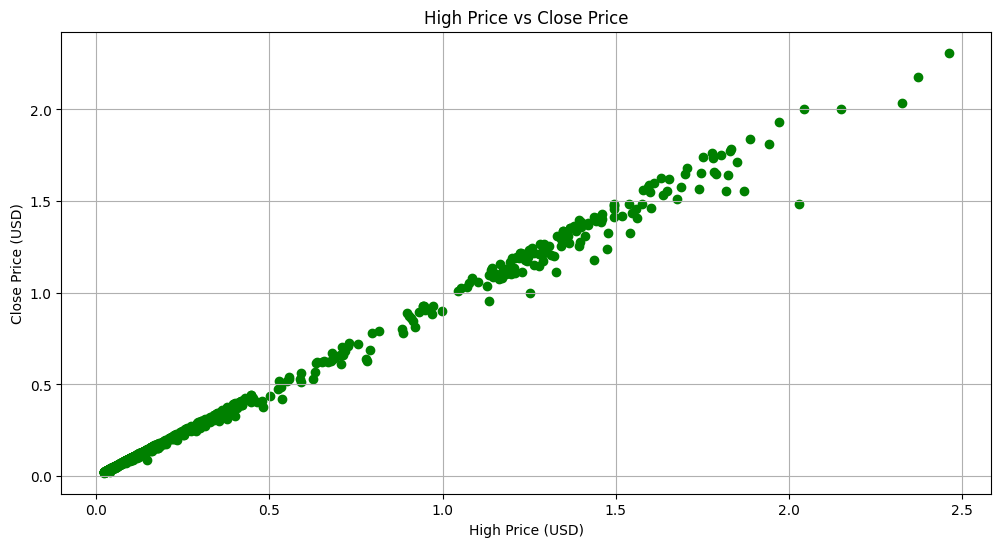

In [7]:
# Create a scatter plot to visualize the relationship between the "high" and "close" price
plt.figure(figsize=(12,6))
plt.scatter(df["high"],df["close"],color="green")
plt.title("High Price vs Close Price")
plt.xlabel("High Price (USD)")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.show()

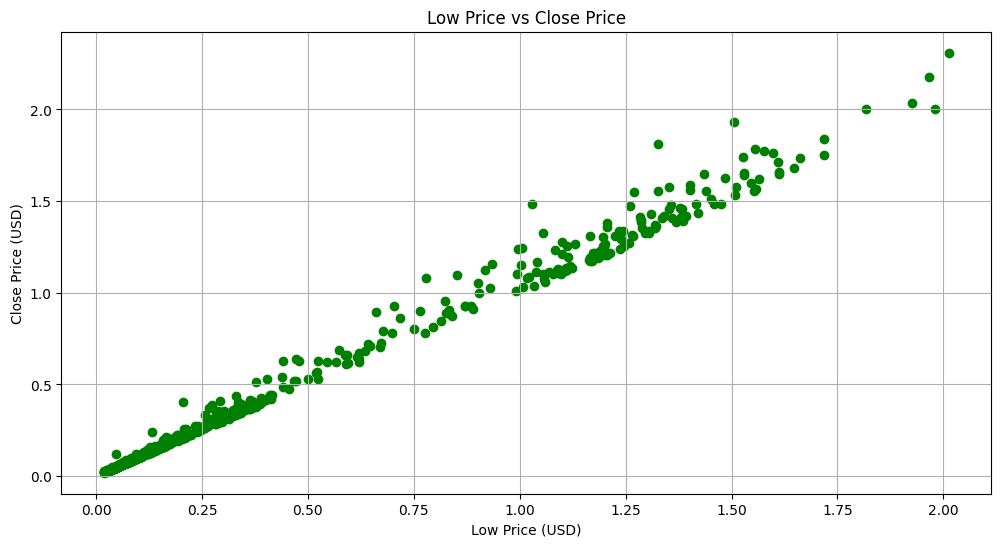

In [8]:
# Create a scatter plot to visualize the relationship between the "low" and "close" price
plt.figure(figsize=(12,6))
plt.scatter(df["low"],df["close"],color="green")
plt.title("Low Price vs Close Price")
plt.xlabel("Low Price (USD)")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.show()

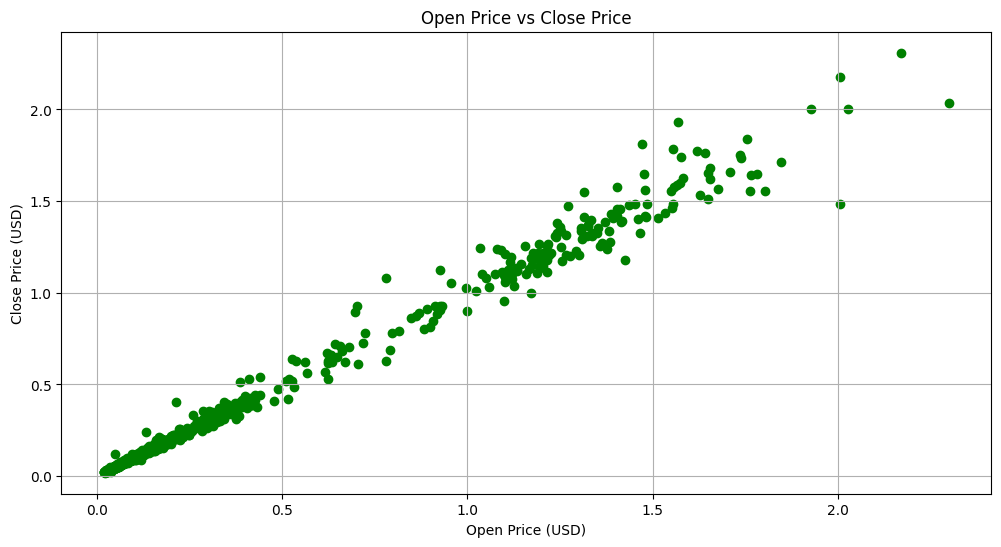

In [9]:
# Create a scatter plot to visualize the relationship between the "open" and "close" price
plt.figure(figsize=(12,6))
plt.scatter(df["open"],df["close"],color="green")
plt.title("Open Price vs Close Price")
plt.xlabel("Open Price (USD)")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.show()

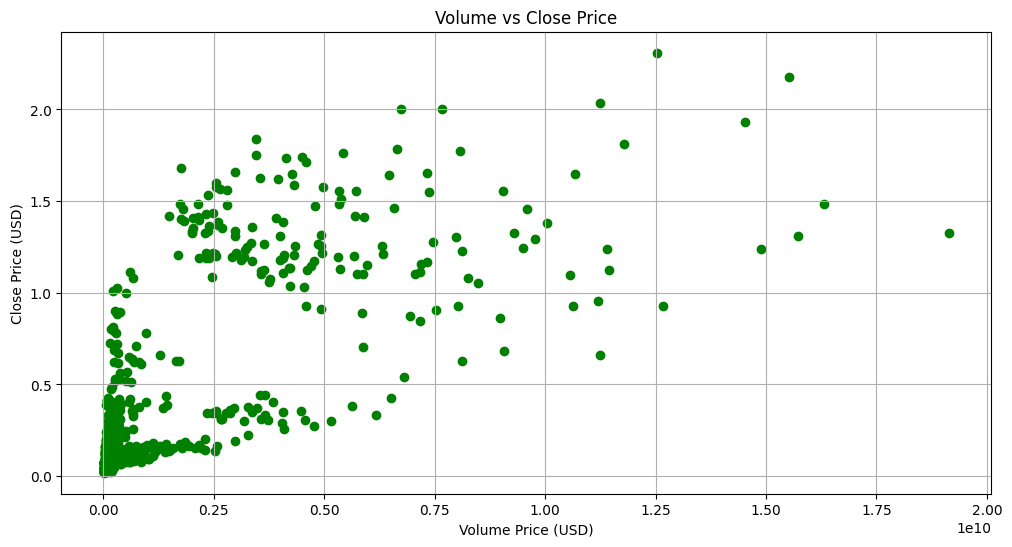

In [10]:
# Create a scatter plot to visualize the relationship between the "volume" and "close" price
plt.figure(figsize=(12,6))
plt.scatter(df["volume"],df["close"],color="green")
plt.title("Volume vs Close Price")
plt.xlabel("Volume Price (USD)")
plt.ylabel("Close Price (USD)")
plt.grid(True)
plt.show()

Model Training

In [ ]:
# Initialize and train four different regression models

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

# Ridge Regression 
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)

# Lasso Regression
lasso_reg = Lasso()
lasso_reg.fit(X_train,y_train)

# ElasticNet Regression
elastic_reg = ElasticNet()
elastic_reg.fit(X_train,y_train)

# Support Vector Regression
svr_reg = SVR()
svr_reg.fit(X_train,y_train)

# Random forest Regressor
rfr_reg = RandomForestRegressor(n_estimators=100,random_state=42)
rfr_reg.fit(X_train,y_train)

# Make the predictions on the test set of each model
y_pred_lin = lin_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)
y_pred_elastic = elastic_reg.predict(X_test)
y_pred_svr = svr_reg.predict(X_test)
y_pred_rfr = rfr_reg.predict(X_test)

Model Evaluation

In [12]:
# Linear Regression Metrics
print("-----Linear Regression-----")
print(f"R-squared: {r2_score(y_test,y_pred_lin):.4f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred_lin):.4f}")
print(f"MSE: {mean_squared_error(y_test,y_pred_lin):.4f}")

# Ridge Regression Metrics
print("-----Ridge Regression-----")
print(f"R-squared: {r2_score(y_test,y_pred_ridge):.4f}")
print(f"MAE: {r2_score(y_test,y_pred_ridge):.4f}")
print(f"MSE: {mean_absolute_error(y_test,y_pred_ridge):.4f}")

# Lasso Regression Metrics
print("-----Lasso Regression-----")
print(f"R-squared: {r2_score(y_test,y_pred_lasso):.4f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred_lasso):.4f}")
print(f"MSE: {mean_squared_error(y_test,y_pred_lasso):.4f}")

# ElasticNet Regression Metrics
print("-----Elastic Regression-----")
print(f"R-squared: {r2_score(y_test,y_pred_elastic):.4f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred_elastic):.4f}")
print(f"MSE: {mean_squared_error(y_test,y_pred_elastic):.4f}")

# Support Vector Regression
print("-----Support Vector Regression-----")
print(f"R-squared: {r2_score(y_test,y_pred_svr):.4f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred_svr):.4f}")
print(f"MSE: {mean_squared_error(y_test,y_pred_svr):.4f}")

# Random Forest Regression
print("-----Random Forest Regression-----")
print(f"R-squared: {r2_score(y_test,y_pred_rfr):.4f}")
print(f"MAE: {mean_absolute_error(y_test,y_pred_rfr):.4f}")
print(f"MSE: {mean_squared_error(y_test,y_pred_rfr):.4f}")

-----Linear Regression-----
R-squared: 0.9984
MAE: 0.0065
MSE: 0.0003
-----Ridge Regression-----
R-squared: 0.9969
MAE: 0.9969
MSE: 0.0089
-----Lasso Regression-----
R-squared: 0.6069
MAE: 0.1593
MSE: 0.0696
-----Elastic Regression-----
R-squared: 0.6069
MAE: 0.1593
MSE: 0.0696
-----Support Vector Regression-----
R-squared: 0.7587
MAE: 0.1294
MSE: 0.0427
-----Random Forest Regression-----
R-squared: 0.9974
MAE: 0.0081
MSE: 0.0005


Determine the best model

In [13]:
# Determine the best model based on R-squared (or other metrics)
# In this case, R-squared is a good indicator of overall fit
r2_scores = {
    "Linear": r2_score(y_test,y_pred_lin),
    "Ridge": r2_score(y_test,y_pred_ridge),
    "Lasso": r2_score(y_test,y_pred_lasso),
    "ElasticNet": r2_score(y_test,y_pred_elastic),
    "SVR": r2_score(y_test,y_pred_svr),
    "RFR":r2_score(y_test,y_pred_rfr)
}

best_model_name = max(r2_scores,key=r2_scores.get)
print(f" Conclusion: The best performing model is {best_model_name} Regression")

# Select thr best model's predictions for the final visualization
if best_model_name == "Linear":
    y_pred_best = y_pred_lin
elif best_model_name == "Ridge":
    y_pred_best = y_pred_ridge
elif best_model_name == "Lasso":
    y_pred_best = y_pred_lasso
elif best_model_name == "ElasticNet":
    y_pred_best = y_pred_elastic
elif best_model_name == "SVR":
    y_pred_best = y_pred_svr
else:
    y_pred_best = y_pred_rfr

 Conclusion: The best performing model is Linear Regression


Visualization after training

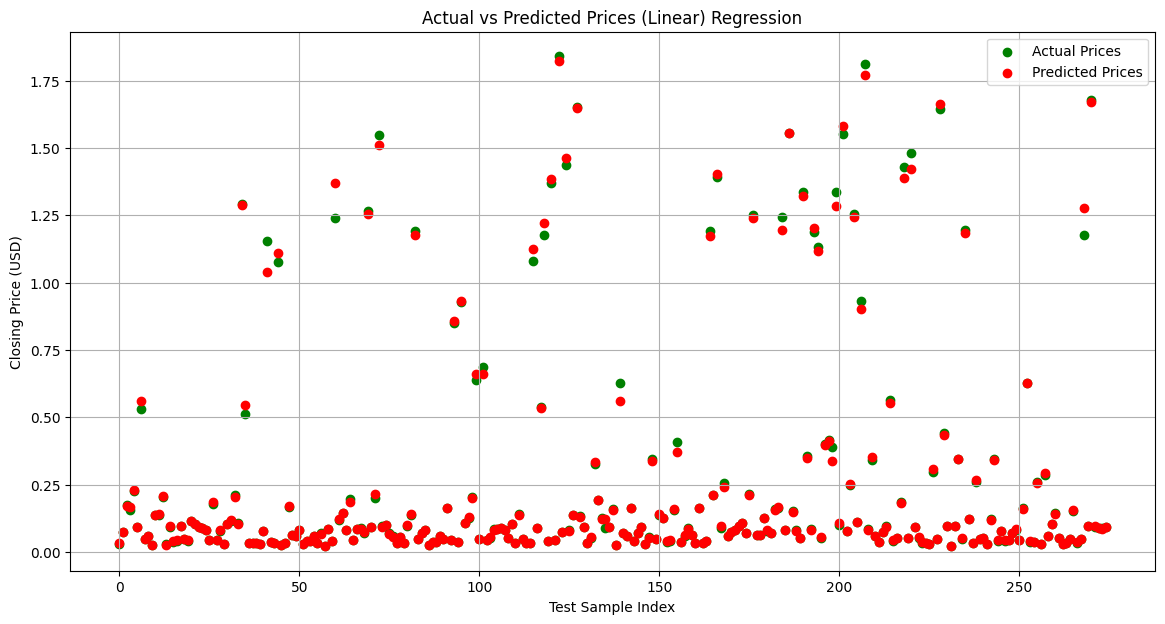

In [14]:
# Create a visualization to compare the actual values with predictions from the best model
# This plot shows how closely the model's prediction align with real data
plt.figure(figsize=(14,7))
plt.scatter(range(len(y_test)),y_test,color="green",label="Actual Prices")
plt.scatter(range(len(y_pred_best)),y_pred_best,color="red",label="Predicted Prices")
plt.title(f"Actual vs Predicted Prices ({best_model_name}) Regression")
plt.xlabel("Test Sample Index")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

User Input and Prediction

In [ ]:
print("-----Predict Cardano Closing Price-----")
print("Enter the following data to predict the closing price")

try:
    # Prompt the user for the faetures values
    high_price = float(input("Enter the High Price:"))
    low_price = float(input("Enter the Low Price:"))
    open_price = float(input("Enter the Open Price:"))
    volume = float(input("Enter the Volume"))

    # Create a new DataFrame with user's input
    # The data must be in the same format as the training data
    new_data = pd.DataFrame([[high_price,low_price,open_price,volume]],columns=features)

    # Use the best-performing model to make a preditcion on the new data
    predicted_price = lin_reg.predict(new_data)

    # Print the final predicted price
    print(f"Predicted Closing Price is: ${predicted_price[0]:.2f}")

except ValueError:
    print("Invalid input. Please enter valid numerical values.")
except Exception as e:
    print(f"An error occurred: {e}")